In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import matplotlib.ticker as tck
import yaml

In [3]:
class phon_yaml(object):
    def __init__(self, address,labels):
        self.address = address
        with open(address+"band.yaml", "r") as f:
            file = f.read()
        F = yaml.load(file)
        F_phon = F['phonon']
        length = len(F_phon)
        self.distance = np.zeros(length)
        self.q_position = np.zeros((length, 3))
        self.frequency = np.zeros((length, len(F_phon[0]["band"])))
        for i in range(length):
            self.distance[i] = F_phon[i]["distance"]
            self.q_position[i, :] = F_phon[i]["q-position"]
            self.frequency[i, :] = [one_band["frequency"]
                                    for one_band in F_phon[i]["band"]]
        self.labels = labels

    def label2index(self):
        index = [int(i) for i in np.linspace(0, len(self.frequency[:, 0]),
                                             len(self.labels))]
        index[-1] = index[-1]-1
        return index

    def phon_plot(self):
        plt.figure(figsize=figsize)
        plt.plot(self.distance, self.frequency, "k")
        for n in self.distance[self.label2index()]:
            plt.axvline(n,c='k',ls='-.',lw=0.6*linewidth)
        plt.xticks(self.distance[self.label2index()], self.labels)
        plt.xlim([self.distance[0],self.distance[-1]])
        plt.axhline(0,c='y',ls='--')
        plt.ylabel("Frequency(THz)", fontdict=fonts)
        ax.yaxis.set_minor_locator(tck.AutoMinorLocator())

### read band.yaml

In [53]:
address=''
with open(address+"band.yaml", "r") as f:
    file = f.read()
F = yaml.load(file)

c:\users\陆雨航\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


### frenquency and distance

In [72]:
F_phon = F['phonon']
length = len(F_phon)
distance = np.zeros(length)
frequency = np.zeros((length, len(F_phon[0]["band"])))
for i in range(length):
    distance[i] = F_phon[i]["distance"]
    frequency[i, :] = [one_band["frequency"] for one_band in F_phon[i]["band"]]
frequency.sort(axis=1)

### Kpoints and kpath

In [55]:
npath=F['npath']
klabel=[]
#symbol=[*i for i in F['labels']]
for i in range(len(F['labels'])):
    if i==0:
        klabel.append(F['labels'][0][0])
    else:
        if F['labels'][i][0]==F['labels'][i-1][1]:
            klabel.append(F['labels'][i][0])
        else:
            klabel.append(F['labels'][i-1][1]+"$|$"+F['labels'][i][0])
klabel.append(F['labels'][-1][1])
klabel

['$\\Gamma$', 'X', 'U$|$K', '$\\Gamma$', 'X', 'W', 'L']

In [56]:
xtick_index=list(range(0,len(distance),int(len(distance)/npath)))
xtick_index.append(len(distance)-1)
xtick=distance[xtick_index]

### read DOS and process

In [7]:
containing_folder = ""
with open(containing_folder+'DOSCAR', 'r') as f:
    s = f.readlines()[6:]

In [8]:
DOS_matrix = []
for i in s:
    DOS_matrix.append([float(j) for j in i.rstrip().split()])
energy = np.array([DOS_matrix[i][0] for i in range(len(DOS_matrix))])
DOS = np.array([DOS_matrix[i][1] for i in range(len(DOS_matrix))])
integral_DOS = np.array([DOS_matrix[i][2] for i in range(len(DOS_matrix))])

### plot band structure and DOS

In [57]:
fontsize = 10
fonts = {'family': 'Times New Roman', 'size': fontsize}
linewidth = 0.5
figsize=(3.149606,1.574803)
plt.rcParams['lines.linewidth']=linewidth
plt.rcParams['axes.linewidth']=linewidth
plt.rcParams['font.family']=fonts['family']
plt.rcParams['font.size']=fonts['size']
plt.rcParams['text.usetex']='True'
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
plt.rcParams['xtick.major.width']=linewidth
plt.rcParams['ytick.major.width']=linewidth
plt.rcParams['xtick.minor.width']=linewidth
plt.rcParams['ytick.minor.width']=linewidth
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ylimit=[-4,4]

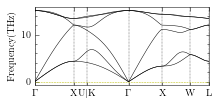

In [73]:
fig= plt.figure(figsize=figsize)
ax=plt.gca()
plt.plot(distance,frequency, "k")
plt.tick_params(top='on', right='on', which='both')
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
for i in xtick:
    plt.axvline(i,c='k',ls='-.',lw=0.6*linewidth)
plt.xticks(xtick, klabel)
plt.xlim([distance[0],distance[-1]])
plt.axhline(0,c='y',ls='--')
plt.ylabel("Frequency(THz)")
plt.tight_layout()

In [74]:
fig.savefig(containing_folder+'phonon.jpg', dpi=600)